<a href="https://colab.research.google.com/github/ai-fast-track/timeseries/blob/master/nbs/training_using_default_settings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training using default settings
> an example showing how we can train an end-to-end time series dataset and achieve an above 97% accuracy using just default settings

In [ ]:
# Run this cell to install the latest version of fastai2 shared on github
!pip install git+https://github.com/fastai/fastai2.git

In [ ]:
# Run this cell to install the latest version of fastcore shared on github
!pip install git+https://github.com/fastai/fastcore.git

In [ ]:
# Run this cell to install the latest version of timeseries shared on github
!pip install git+https://github.com/ai-fast-track/timeseries.git

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai2.basics import *

In [ ]:
# hide
# Only for Windows users because symlink to `timeseries` folder is not recognized by Windows
import sys
sys.path.append("..")

In [ ]:
from timeseries.all import *

# Training and End-to-End Model
> This is a code-dense example. For a more detailed example showing all options found in this `timeseries` package please refer to this [notebook] (https://github.com/ai-fast-track/timeseries/blob/master/nbs/index.ipynb) 


## Default settings:

| Param                   |  Value                      | 
|:----------------------- | ---------------------------:| 
| **model**               | inception_time              |
| **opt_func**            | Ranger                      |
| **loss_func**           | LabelSmoothingCrossEntropy()|
| **Normalize**           | per_sample_per_channel      |

## Training a model

In [ ]:
# You can choose any multivariate or univariate dataset listed the `data.py` file
path = unzip_data(URLs_TS.NATOPS)
fnames = [path/'NATOPS_TRAIN.arff', path/'NATOPS_TEST.arff']
dls = TSDataLoaders.from_files(bs=32,fnames=fnames, batch_tfms=[Normalize()], num_workers=0) # num_workers=0 is for Windows platform
learn = ts_learner(dls)
learn.fit_one_cycle(25, lr_max=1e-3) 

epoch,train_loss,valid_loss,accuracy,time
0,2.803271,1.788028,0.138889,00:02
1,2.640071,1.800265,0.152778,00:02
2,2.337025,1.809550,0.152778,00:02
3,1.958659,1.631379,0.375000,00:02
4,1.638520,0.996783,0.763889,00:02
5,1.393388,0.791485,0.833333,00:02
6,1.217224,0.741780,0.861111,00:02
7,1.084642,0.672229,0.861111,00:02
8,0.981334,0.743353,0.833333,00:02
9,0.901527,0.734145,0.847222,00:02


## Graphs

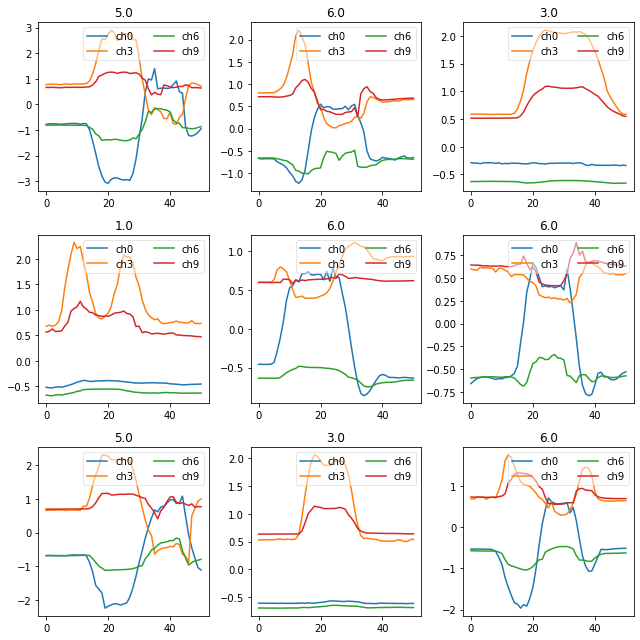

In [ ]:
dls.show_batch(chs=range(0,12,3))

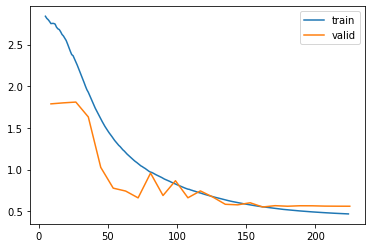

In [ ]:
learn.recorder.plot_loss()

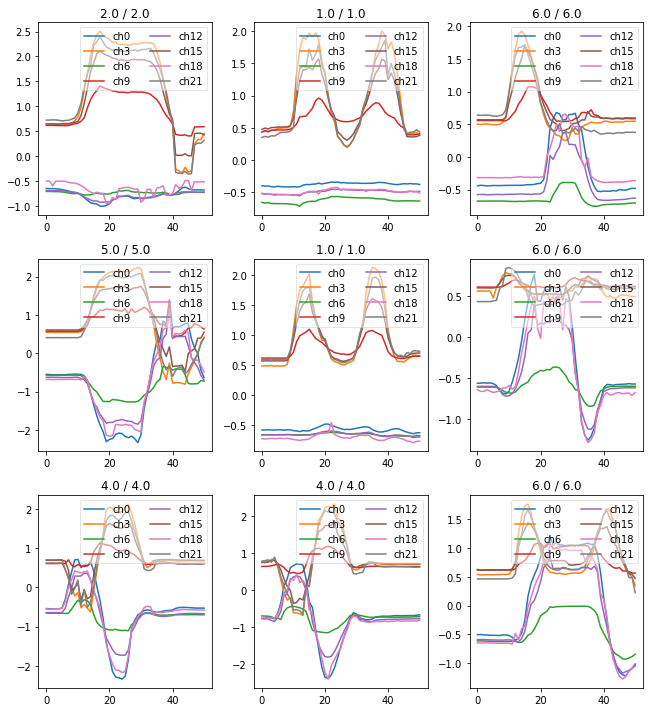

In [ ]:
learn.show_results(chs=range(0,24,3))

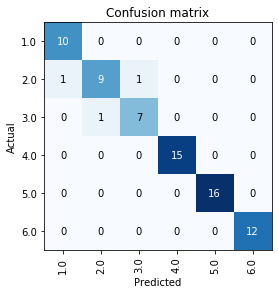

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused()

[('2.0', '1.0', 1), ('2.0', '3.0', 1), ('3.0', '2.0', 1)]

![](images/nature-red-forest-leaves.jpg)


In [ ]:
!pip list

Package                            Version             Location                    
---------------------------------- ------------------- ----------------------------
alabaster                          0.7.12              
anaconda-client                    1.7.2               
anaconda-project                   0.8.3               
argh                               0.26.2              
asn1crypto                         1.3.0               
astroid                            2.3.3               
astropy                            4.0                 
atomicwrites                       1.3.0               
attrs                              19.3.0              
Babel                              2.8.0               
backcall                           0.1.0               
backports.os                       0.1.1               
backports.shutil-get-terminal-size 1.0.0               
beautifulsoup4                     4.8.2               
bitarray                           1.2.0        